In [1]:
import draw2Svg as dw

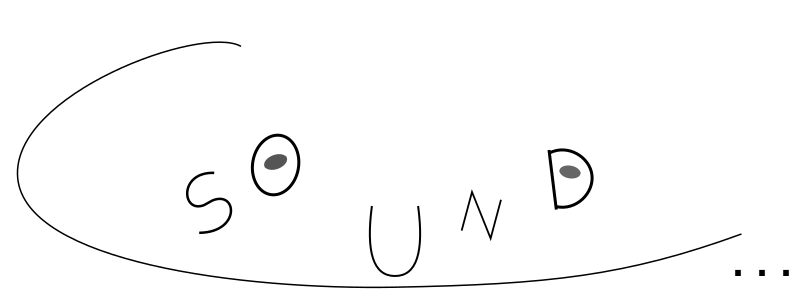

In [220]:
w,h = 800,300
d = dw.Drawing(w,h)

xnum = 2 # posts (= one more than divisions)
ynum = 2
mleft = 10
mright = 20
mtop = 10
mbot = 10
xsize = w-mleft-mright
ysize = h-mtop-mbot
xunit = xsize / (xnum-1)
yunit = ysize / (ynum-1)

exec(open('../01/draw2Svg_funs.py').read())
exec(open('../01/draw2Svg_musicnotation.py').read())

def xgrid(inval):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write"""
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def ygrid(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

def myS(x=50,y=50,h=40,rot=10,sw=1,c='black',**args):
    """xy is top left of it.  rot = rotate
    h = height sw = stroke-width   c=color"""
    p1 = x+h*58/40,y+h*12/40
    p2a = x+h*46/40,y+h*31/40
    p2b = x+h*52/40,y+h*29.5/40
    p3 = x+h*38/40,y+h*48/40
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p1)
    cp1a = x+h*35/40,y+h*5/40
    cp1b = x+h*30/40,y+h*33/40
    p.C(*cp1a,*cp1b,*p2a)
    p.L(*p2b)
    cp2a = x+h*70/40,y+h*27/40
    cp2b = x+h*65/40,y+h*55/40
    p.C(*cp2a,*cp2b,*p3)
    d.append(p)

def myU(x=50,y=50,h=40,sw=1,c='black',rot=0,**args):
    """x,y is top left"""
    w = h*.66
    p1 = x,y
    p2 = x+w/2,y+h
    p3 = x+w,y
    c1 = x-w*.2,y+h
    c2 = x+w*1.2,y+h
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p1)
    p.Q(*c1,*p2)
    p.Q(*c2,*p3)
    d.append(p)

def myN(x=50,y=50,h=40,sw=1,c='black',rot=0,**args):
    """x,y is top left"""
    w = h*.75
    p1 = x,y
    p2 = x,y+h
    p3 = x+w,y
    p4 = x+w,y+h
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p2).L(*p1).L(*p4).L(*p3)
    d.append(p)

def myD(x=50,y=50,h=40,sw=1,c='black',rot=0,**args):
    """x,y is top left"""
    w = h*.66
    p1 = x,y
    p2 = x,y+h
    p3 = x+w,y+h/2
    diff = h/20
    c1 = x+w/2,y-h/15
    c2 = x+w*1,y+h*.2
    c2a = x+w*1,y+h*.8
    c3 = x+w/2,y+h+h/15
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p1)
    p.L(*p2)
    p.M(x,y+diff)
    p.C(*c1,*c2,*p3)
    p.C(*c2a,*c3,x,y+h-diff)
    d.append(p)

# C
c = dw.Path(fill='none',stroke='black',stroke_width=1.5)
p1 = xgrid(.3),ygrid(.13)
c1 = xgrid(.25),ygrid(.05)
c2 = xgrid(0),ygrid(.3)
p2 = xgrid(0.01),ygrid(.6)
c3 = xgrid(.3),ygrid(1)
p3 = xgrid(.5),ygrid(.99)
c4 = xgrid(.8),ygrid(.95)
p4 = xgrid(.95),ygrid(.8)
c.M(*p1)
c.C(*c1,*c2,*p2)
c.S(*c3,*p3)
c.S(*c4,*p4)
d.append(c)

# S
myS(xgrid(.15),ygrid(.6),60,-15,sw=2.5)

# O
x,y = xgrid(.33),ygrid(.5)
owid,ohgt = 23,30
xcenter = x+owid/2
ycenter = y+ohgt/2
o = dw.Ellipse(xcenter,ycenter,owid,ohgt,stroke='black',fill='none',stroke_width=3,
               transform='rotate(10,%f,%f)'%(xcenter,ycenter))
d.append(o)
note(xcenter,ycenter-3,18,fill='#555')

# U
myU(xgrid(.47),ygrid(.7),70,sw=2)

# N
myN(xgrid(.6),ygrid(.65),rot=15,sw=1.8)

# D
x = xgrid(.7)
y = ygrid(.5)
myD(x,y,60,rot=-7,sw=3)
x += 21
y += 22
note(x,y,16,fill='#666',transform='rotate(30,%f,%f)'%(x,y))

# dots
text('...',xgrid(.93),ygrid(.95),fontsize=40,font_family='courier',font_weight='bold')

# eye brows
b = dw.Path(stroke='black',fill='none')
bsizx = 36
b.M(0,0)
b.Q(bsizx/2,-bsizx,bsizx,0)
#d.append(dw.Use(b,xgrid(.33),ygrid(.36)))

#d.setPixelScale(1)
#d.savePng('../../images/00-preface-image.png')
d

In [210]:
help(dw.Use)

Help on class Use in module draw2Svg.elements:

class Use(DrawingBasicElement)
 |  Use(otherElem, x, y, **kwargs)
 |  
 |  A copy of another element
 |  
 |  The other element becomes an SVG def shared between all Use elements
 |  that reference it.
 |  
 |  Method resolution order:
 |      Use
 |      DrawingBasicElement
 |      DrawingElement
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, otherElem, x, y, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  TAG_NAME = 'use'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from DrawingBasicElement:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  allChildren(self)
 |      Returns self.children and self.orderedChildren as a single list.
 |  
 |  appendAnim(self, animateElement)